# Board Level Strategic Insight Request
## Data Analyst: Mary Shanley Sencil
## Date of Request: September 26, 2025

Scenario

A mid-sized financial institution has been actively expanding its personal loan portfolio. However, recent shifts in customer behavior and credit risk profiles have prompted the Board of Directors to revisit the underlying factors influencing loan approvals and amounts granted. The board is particularly concerned with credit risk, profitability, and data-driven decision-making.

During a quarterly strategy meeting, the Chief Risk Officer (CRO) presents a dashboard highlighting inconsistencies in the average loan amounts issued across customer segments. Some applicants with moderate income and lower credit scores are receiving higher-than-expected loan amounts, while more qualified applicants appear to be under-leveraged.

In response, the Chairperson of the Board raises a crucial question:

"Among all the customer attributes we’ve been collecting—like income, credit score, employment history, age, debt-to-income ratio, and education level—can we clearly identify which of these factors have the strongest statistical relationship with the loan amount issued?"

The board mandates the Data Analytics Team to conduct an immediate correlation analysis to:

1. Identify which factors most strongly drive loan amounts.

2. Distinguish between statistically significant vs. insignificant variables.

3. Support future decisions about automating loan approvals, tightening risk thresholds, or tailoring products to specific customer profiles.

Create a Business Analytics Report that address the request of the board.

In [ ]:
#Import necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import qdesc as qd
import os

In [ ]:
#Load the data
df = pd.read_excel("HypotheticalLoansData.xlsx")

In [ ]:
#Check the first 5 rows of the dataframe
df.head()

,Income,CreditScore,EmploymentYears,DebtToIncome,Age,EducationLevel,LoanAmount
0,67450.71,746.31,22,0.27,48,Bachelor,105119.57
1,57926.04,795.47,11,0.38,59,Bachelor,104818.75
2,69715.33,630.07,16,0.37,26,Bachelor,99397.74
3,82845.45,728.15,7,0.23,29,High School,99163.53
4,56487.70,667.47,10,0.38,40,High School,80141.29


In [ ]:
#Check the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Income           500 non-null    float64
 1   CreditScore      500 non-null    float64
 2   EmploymentYears  500 non-null    int64  
 3   DebtToIncome     500 non-null    float64
 4   Age              500 non-null    int64  
 5   EducationLevel   500 non-null    object 
 6   LoanAmount       500 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 27.5+ KB


In [ ]:
#Checking for NAs or missing values
df.isnull().values.any()

np.False_

In [ ]:
#Perform descriptive analytics and AD statistics
qd.desc(df)

,count,mean,std,median,MAD,min,max,AD_stat,5% crit_value
Income,500.0,60102.57,14718.80,60191.96,9996.96,11380.99,117790.97,0.30,0.78
CreditScore,500.0,701.59,48.90,701.43,31.18,565.16,831.62,0.23,0.78
EmploymentYears,500.0,14.31,8.52,14.00,7.00,0.00,29.00,5.22,0.78
DebtToIncome,500.0,0.30,0.10,0.30,0.07,0.01,0.57,0.43,0.78
Age,500.0,42.54,12.71,42.50,11.50,21.00,64.00,6.43,0.78
LoanAmount,500.0,87561.53,13021.30,87579.97,9308.11,53960.78,119076.87,0.28,0.78


# Descriptive Analysis

1. Income- The distribution of income appears fairly symmetrical, as indicated by the close alignment of the mean and median. The Anderson–Darling statistic is below 5% of the critical value, meaning normality cannot be rejected. Among all variables, Income has the widest range and the highest standard deviation, suggesting substantial variation from very low to very high earnings across individuals
2. For CreditScore, CreditScore shows a symmetric distribution and satisfies the assumption of normality, supported by an AD statistic below the critical threshold. This indicates that the sample population generally reflects healthy credit behavior.
3. For Employement Years, The mean slightly exceeds the median, pointing to a right-skewed distribution. The AD statistic exceeds the critical value; thus, the null hypothesis of normality is rejected. This suggests that while many individuals have moderate years of employment, a smaller group has significantly longer employment durations, causing the skew.
4. For Debit to Income, The mean and median are identical, indicating a strongly symmetric distribution. The low standard deviation suggests consistency in debt-to-income levels across the sample. The AD statistic does not exceed the critical value, so the distribution is considered normally distributed.
5. For Age, Although Age appears symmetric, the AD test indicates that the distribution is not normal, as the null hypothesis is rejected. This implies subtle deviations from perfect normality, despite visual symmetry.
6. For Loan Amount, The close proximity of the mean and median suggests a symmetrical distribution. The AD statistic falls below the critical value, meaning normality cannot be rejected. Results indicate that most borrowers tend to take moderately high loan amounts, reflected by the distribution’s central tendency.

In [ ]:
# Generate frequency distribution for all
qd.freqdist_a(df)

,Column,Value,Count,Percentage
0,EducationLevel,Bachelor,196,39.2
1,EducationLevel,High School,143,28.6
2,EducationLevel,Master,108,21.6
3,EducationLevel,PhD,53,10.6


# Frequency Analysis
The frequency distribution indicates that the sample is predominantly composed of individuals with higher levels of educational attainment. The largest group consists of those with a Bachelor’s degree (39.2%), followed by High School graduates (28.6%), and individuals holding a Master’s degree (21.6%). The smallest group is composed of those with a PhD (10.6%).

This distribution suggests that the population under study—likely loan applicants or financial clients—is generally well educated, with a substantial proportion having completed at least a four-year degree. The concentration of higher education levels may also reflect the characteristics of individuals who typically seek or qualify for financial services.


--- Variable: Income ---
  Anderson-Darling Statistic : 0.2978
  Critical Value (@ 5.0%) : 0.7810
  Decision : Fail to Reject Null


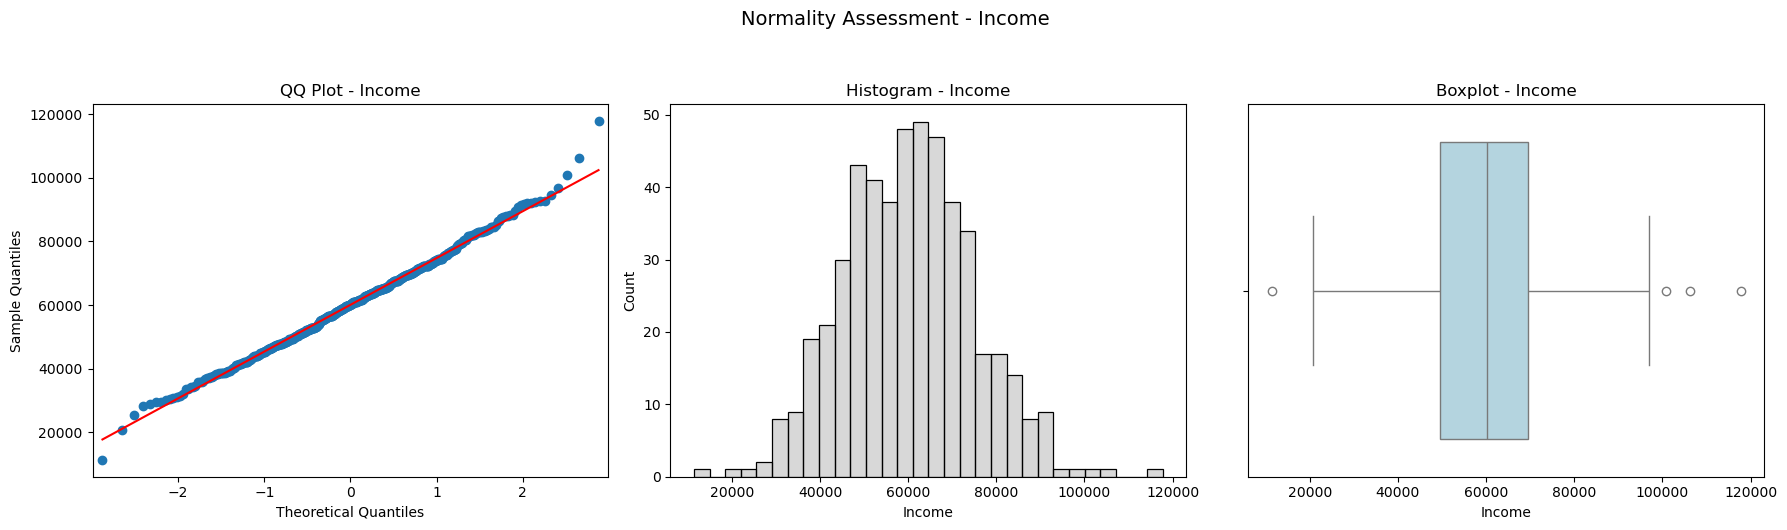


--- Variable: CreditScore ---
  Anderson-Darling Statistic : 0.2349
  Critical Value (@ 5.0%) : 0.7810
  Decision : Fail to Reject Null


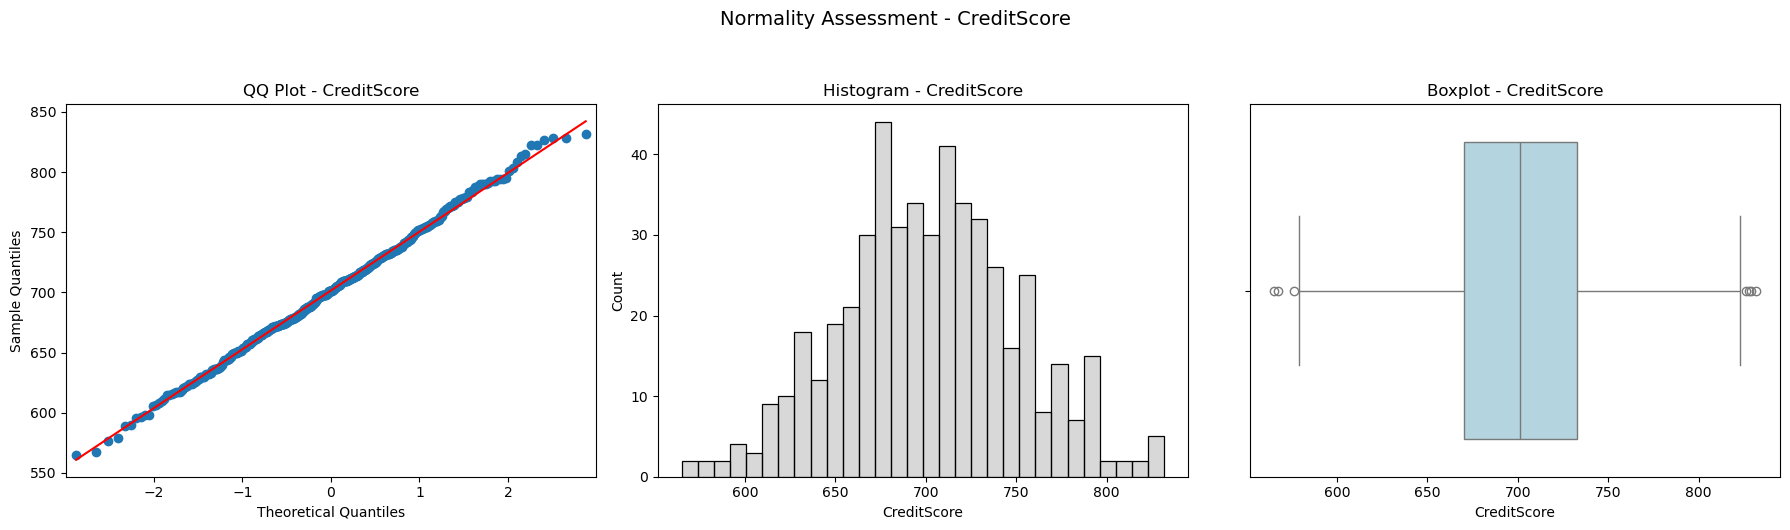


--- Variable: EmploymentYears ---
  Anderson-Darling Statistic : 5.2192
  Critical Value (@ 5.0%) : 0.7810
  Decision : Reject Null


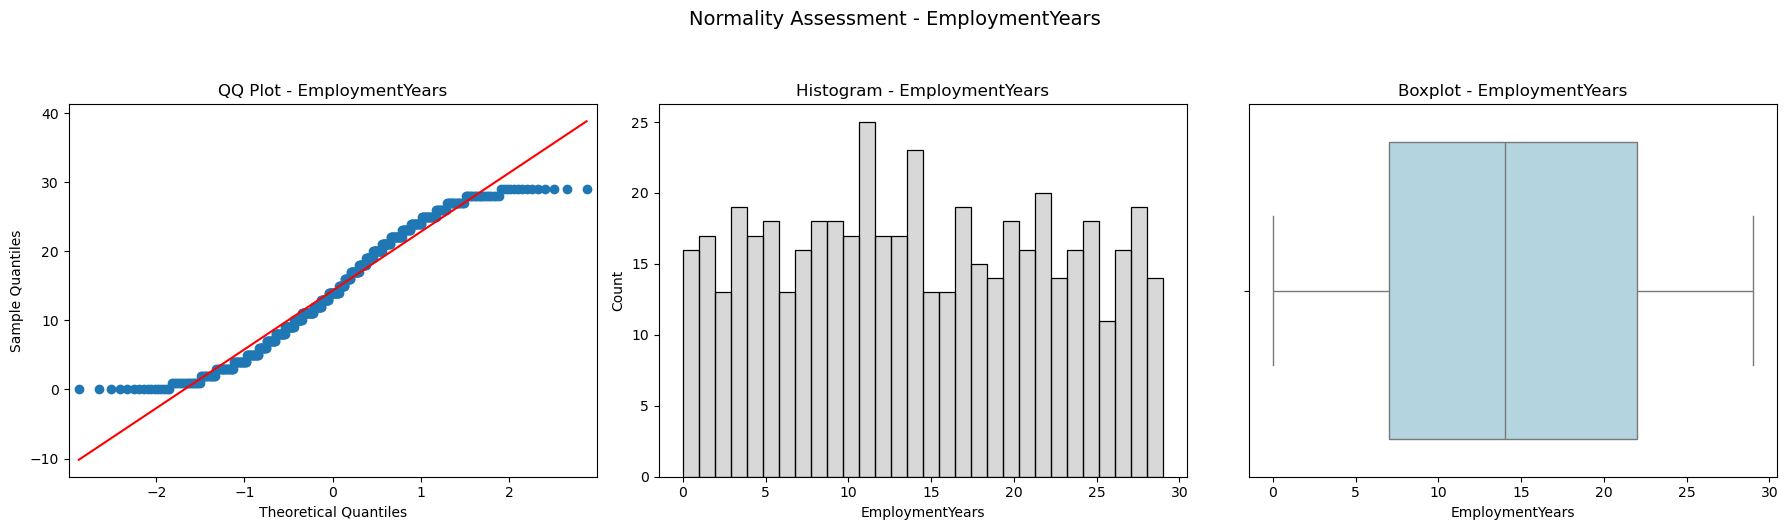


--- Variable: DebtToIncome ---
  Anderson-Darling Statistic : 0.4250
  Critical Value (@ 5.0%) : 0.7810
  Decision : Fail to Reject Null


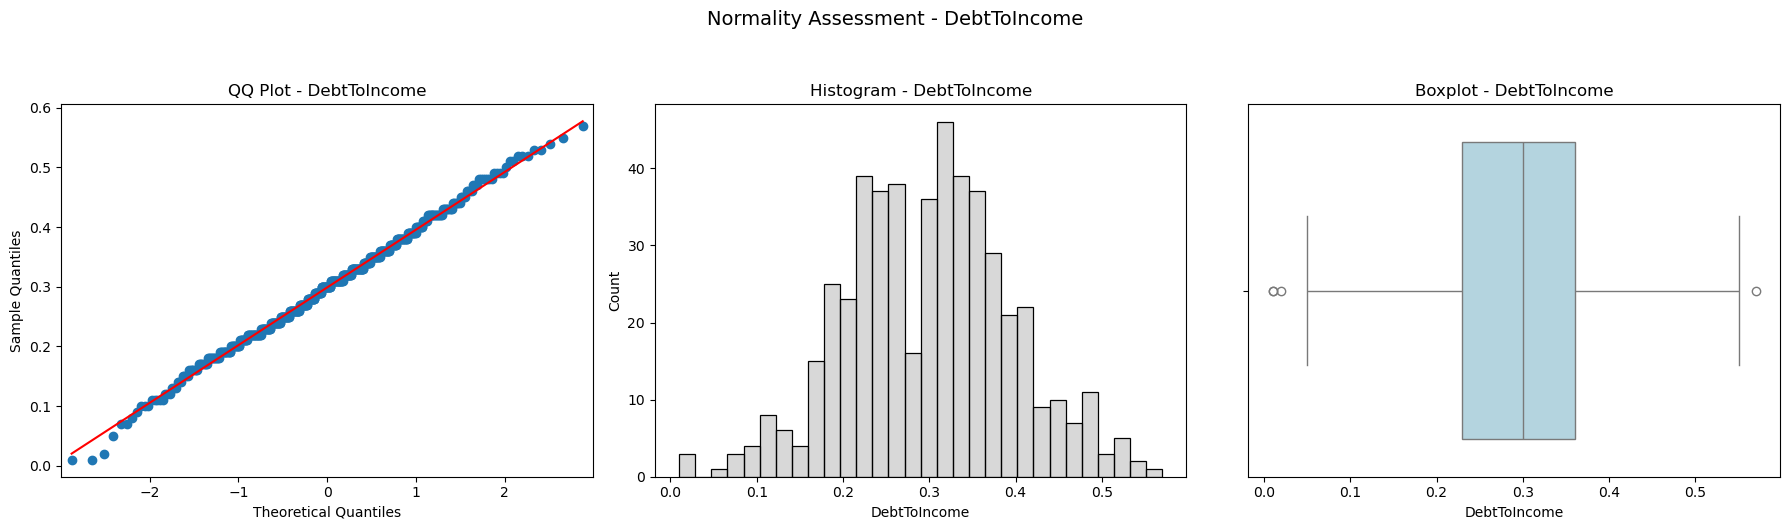


--- Variable: Age ---
  Anderson-Darling Statistic : 6.4294
  Critical Value (@ 5.0%) : 0.7810
  Decision : Reject Null


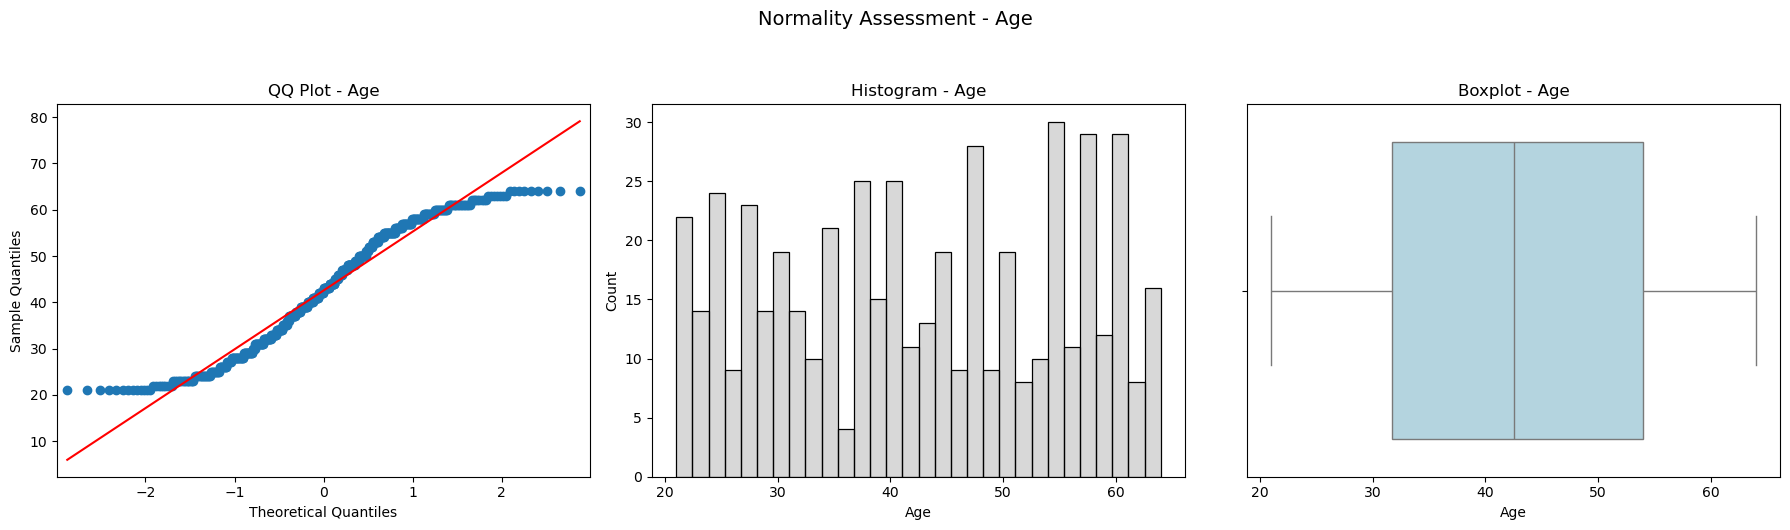


--- Variable: LoanAmount ---
  Anderson-Darling Statistic : 0.2794
  Critical Value (@ 5.0%) : 0.7810
  Decision : Fail to Reject Null


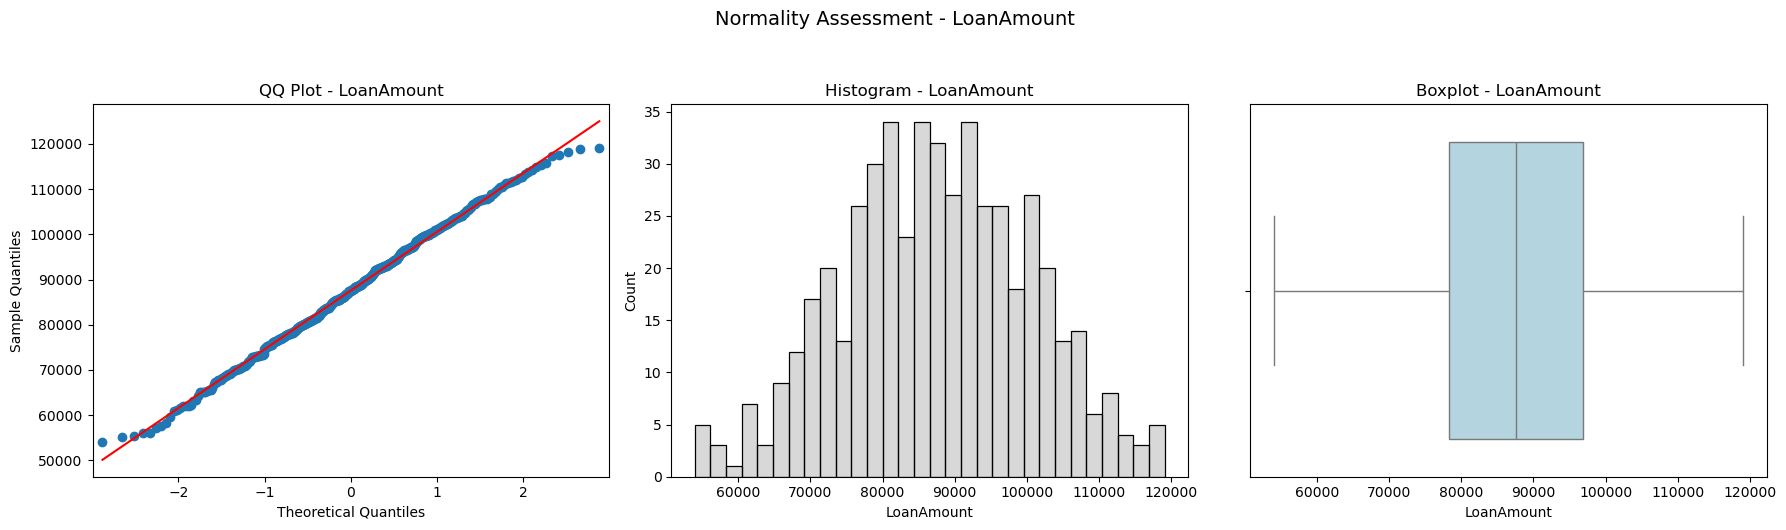

In [ ]:
#Normality check using Data Visualization and AD-test
qd.normcheck_dashboard(df)

# Analysis
1. For Income, The Q–Q plot shows that most data points align closely with the reference line, indicating linearity and supporting normality. The histogram displays a bell-shaped distribution, while the boxplot suggests symmetry with a few observable outliers. Overall, the variable demonstrates characteristics consistent with a normal distribution.

2. For CreditScore, The Q–Q plot reveals strong linearity, with data points clustering tightly along the diagonal. The histogram is symmetric and bell-shaped, further supporting normality. The boxplot shows a generally symmetrical distribution with minor outliers. Additionally, the Anderson–Darling statistic is significantly lower than the critical value, leading to a failure to reject the null hypothesis of normality.

3. For Employment Years, The Anderson–Darling statistic exceeds the critical value, indicating rejection of the null hypothesis. The Q–Q plot exhibits an S-shaped pattern, showing deviations from linearity. The histogram is irregular and lacks the smooth, bell-shaped appearance of a normal distribution. Although the boxplot appears somewhat symmetrical, the test results and visualizations collectively confirm that the variable is not normally distributed.

4. For Debit to Income, The Q–Q plot demonstrates strong linearity, with data points clustering near the reference line. The histogram displays a bell-like shape, though not perfectly smooth. The boxplot suggests symmetry with a small number of outliers. Since the Anderson–Darling statistic is well below the critical value, the null hypothesis of normality is not rejected.

5. For Employment Years, the AD-stat is much greater than the critical value, so we reject the null hypothesis. The QQ Plot projects the S-shaped data points, so it is not linear and is not normal. The histogram is highly irregular and does not resemble a bell curve. The boxplot looks symmetrical, and since the AD-stat is higher, we reject the null hypothesis.

6. For Loan Amount, The Anderson–Darling statistic is much lower than the critical value, so the null hypothesis of normality is not rejected. The Q–Q plot shows strong alignment with the reference line, supporting linearity. The histogram exhibits a clear bell-shaped pattern, and the boxplot shows a symmetrical distribution with no prominent outliers. These indicators confirm that Loan Amount follows a normal distribution.

In [ ]:
# 1. Select numeric variables
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove("LoanAmount")  # predictors only

target = "LoanAmount"

# 2. Compute Spearman correlations with p-values
results = []
for col in numeric_cols:
    r, p = stats.spearmanr(df[col], df[target])
    results.append({
        "Variable": col,
        "Spearman_rho": r,
        "p_value": p
    })

spearman_df = pd.DataFrame(results).sort_values("Spearman_rho", ascending=False)

# 3. Display table
print("Spearman correlation with LoanAmount:")
display(spearman_df)

Spearman correlation with LoanAmount:


,Variable,Spearman_rho,p_value
1,CreditScore,0.340454,4.925163e-15
2,EmploymentYears,0.301337,5.908019e-12
0,Income,0.226108,3.228689e-07
4,Age,-0.037659,4.007585e-01
3,DebtToIncome,-0.198562,7.695095e-06


# Correlation Analysis
1. CreditScore - The results indicate a strong positive correlation between CreditScore and Loan Amount. This suggests that as an individual’s credit score increases, the loan amount they receive also tends to increase. This relationship aligns with typical lending behavior, where borrowers with stronger credit profiles are perceived as lower risk and are therefore approved for larger loan amounts.

2. EmploymentYears - Employment Years demonstrates a moderate positive correlation with Loan Amount. This means that individuals with longer employment histories are more likely to secure higher loan amounts. A stable and lengthy employment record signals financial reliability, making lenders more confident in extending larger loans.

3. Income - Income shows a weak positive correlation with Loan Amount. While higher income generally supports the capacity to take on larger loans, the relationship is not as strong as those with credit score or employment stability. This suggests that although income is relevant, lenders may prioritize creditworthiness and employment history more heavily when determining loan size.

4. Age -  Age exhibits a very weak correlation with Loan Amount, indicating that the relationship is not statistically meaningful. This implies that age has minimal influence on the size of the loan granted, and lenders do not view age as a major determinant of borrowing capacity within this dataset.

5. Debt to Income - Debt-to-Income shows a weak negative correlation with Loan Amount. This indicates that as an individual’s debt burden relative to income increases, the loan amount they are granted tends to decrease. A higher debt-to-income ratio suggests greater financial strain, leading lenders to be more cautious and reduce the size of additional loans offered.

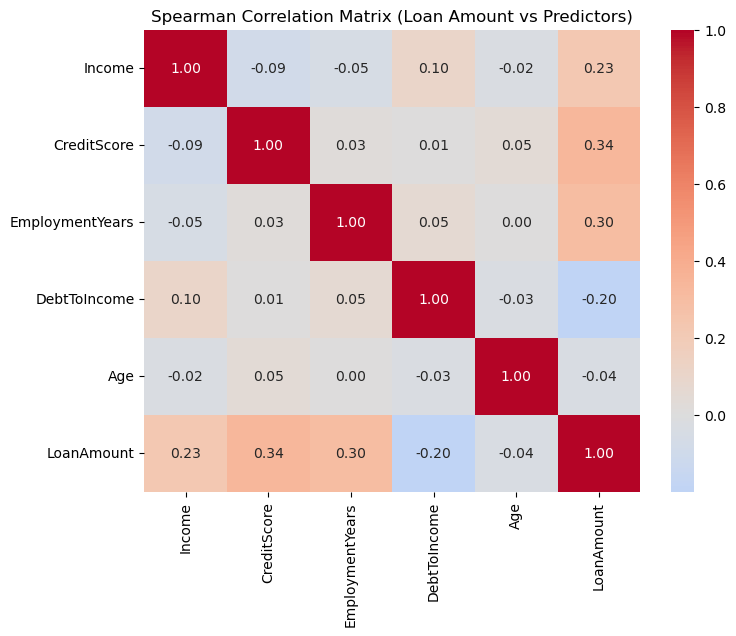

In [ ]:
#Heatmap visualization
corr_matrix = df[numeric_cols + [target]].corr(method="spearman")
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Spearman Correlation Matrix (Loan Amount vs Predictors)")
plt.show()

# HeatMap Analysis

The heatmap highlights the relationships among the variables and their influence on Loan Amount. The analysis shows that most predictors are relatively independent of each other while collectively impacting loan size. The most significant factors for securing a larger loan are CreditScore and Employment Years, followed by a lower Debt-to-Income ratio and higher Income. In contrast, Age appears to have minimal relevance in determining loan amount, confirming its limited predictive value.

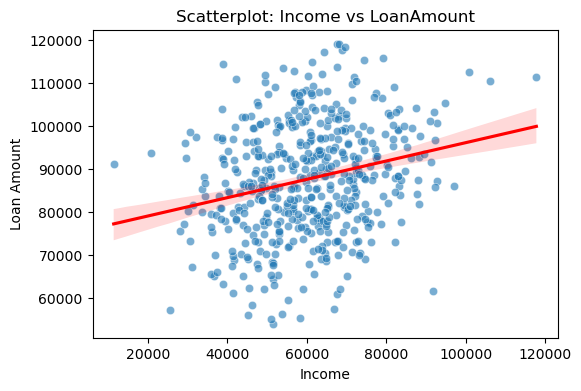

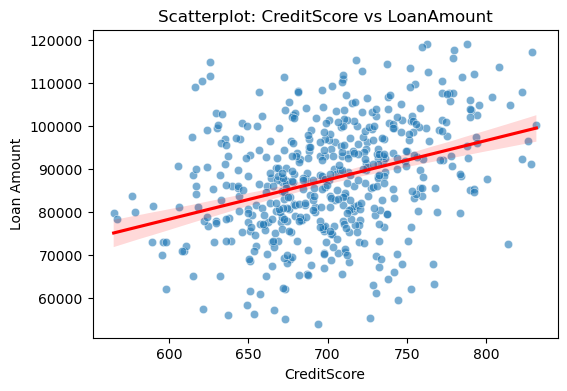

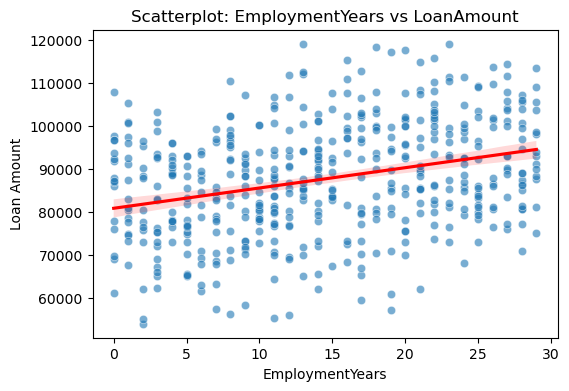

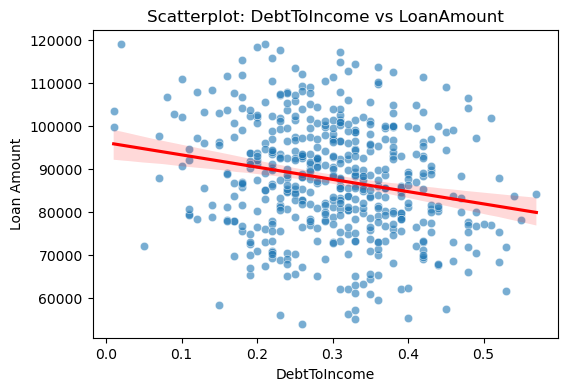

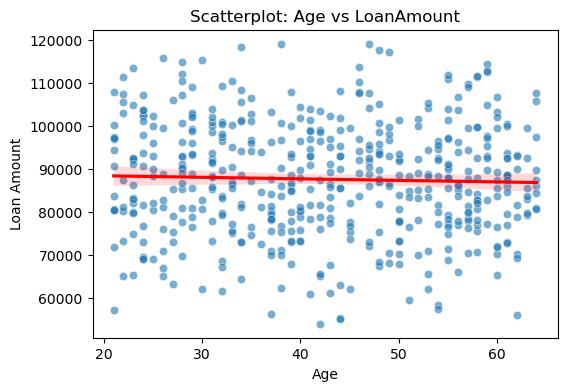

In [ ]:
# Scatterplots: LoanAmount vs each numeric predictor
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df[target], alpha=0.6)
    sns.regplot(x=df[col], y=df[target], scatter=False, color='red')  # adds trend line (linear fit)
    plt.title(f"Scatterplot: {col} vs {target}")
    plt.xlabel(col)
    plt.ylabel("Loan Amount")
    plt.show()


# Scatter Plot Analysis

1. Income vs. LoanAmount: A moderate positive linear trend is observed, consistent with the correlation coefficient (ρ = 0.23). The line of best fit indicates that higher income generally corresponds to higher loan amounts. However, the data points are widely scattered around the line, suggesting considerable variability in the relationship.

2. CreditScore vs. LoanAmount: A strong positive linear trend is evident, confirming that CreditScore has the highest correlation with Loan Amount. The upward-sloping line of best fit demonstrates that applicants with higher credit scores tend to secure substantially larger loans.

3. EmploymentYears vs. LoanAmount: A moderate positive linear trend (ρ = 0.30) is observed. The line of best fit slopes upward, indicating that applicants with longer employment histories are generally approved for higher loan amounts compared to those with fewer years of employment.

4. DebtToIncome vs. LoanAmount: A weak negative linear trend is visible. The line of best fit slopes downward, showing that as an applicant’s debt-to-income ratio increases, the approved loan amount tends to decrease.

5. Age vs. LoanAmount: No discernible linear relationship is present. Data points are widely scattered, and the line of best fit is nearly horizontal, confirming that Age does not significantly influence loan amount decisions.

# Conclusion

In conclusion, the correlation analysis shows that:
1. CreditScore is the strongest determinant, showing a clear and statistically significant positive relationship with loan amounts. Applicants with higher credit scores consistently receive larger loans, reflecting standard lending practices where stronger creditworthiness allows greater exposure. Employment Years is the next most influential factor, with longer and more stable employment histories associated with higher loan amounts. Income is positively correlated with loan amounts, but its effect is weaker compared to CreditScore and Employment Years. Conversely, the Debt-to-Income (DTI) ratio exhibits a negative correlation, indicating that higher existing debt limits the size of new loans. Age shows no meaningful or statistically significant relationship, suggesting it is not a relevant factor in loan amount determination.

2. Correlation tests confirm that CreditScore, Employment Years, Income, and Debt-to-Income ratio have statistically significant relationships with Loan Amount. CreditScore and Employment Years have the strongest significance, reflected by very low p-values, while Income and DTI are significant but exert weaker effects. Age is statistically insignificant and should not be considered in predictive or decision-making models.

3. These results suggest that automated loan approval systems and product tailoring should prioritize CreditScore and Employment Years as primary determinants of loan sizing. Income can serve as a supporting factor, while Age should be excluded to avoid unnecessary noise or regulatory risk. Aligning decision-making around these key variables can improve consistency, reduce instances of disproportionately high loans to less-qualified applicants, and enhance portfolio profitability while maintaining robust risk management.

# Insights and Recommendation

The analysis demonstrates that CreditScore and EmploymentYears are the most influential factors in determining loan amounts, while Income and Debt-to-Income (DTI) ratio play secondary yet meaningful roles. These findings indicate that creditworthiness and employment stability are the strongest indicators of both repayment capacity and appropriate loan sizing. Conversely, Age does not provide predictive value and should not affect loan decisions.

Recommendations include:
1. To prioritize CreditScore and EmploymentYears in loan approval models and automation logic to better align loan amounts with applicant quality.
2. Use Debt-to-Income ratio to limit the approved amounts of loans to avoiad excessive leverage.
3. Since it has no effect, exclude Age from decision-making, both to simplify the model and to avoid regulatory or fairness concerns.

